# Example: moon-shaped data using RealNVP

2020-11-25 first created

In [1]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from flow import RealNVP
from utils import *
import tensorflow as tf
mnist = tf.keras.datasets.mnist

print(tf.__version__)
!python --version

2.3.1
Python 3.7.6


In [2]:
inp_dim = 2
n_sample = 1000
n_couple_layer = 5
n_hid_layer = 3
n_hid_dim = 512

n_batch = 128
n_epoch = 2000
n_display = 200

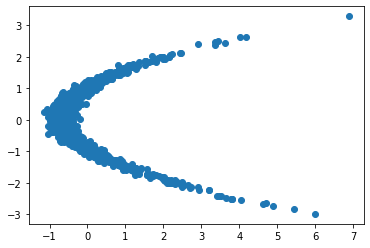

In [3]:
x2 = np.random.normal(0, 4, n_sample)
x1 = np.random.normal(0.25 * x2**2, [1]*n_sample)
X = np.stack([x1, x2], axis=1).astype('float32')
X = StandardScaler().fit_transform(X)
plt.scatter(X[:,0], X[:,1]);

## Initialize the model

In [4]:
model = RealNVP(inp_dim, n_couple_layer, n_hid_layer, n_hid_dim, name='RealNVP')
model.build(input_shape=(inp_dim,))
model.summary()

Model: "RealNVP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer0 (NVPCouplingLayer)    multiple                  527362    
_________________________________________________________________
Layer1 (NVPCouplingLayer)    multiple                  527362    
_________________________________________________________________
Layer2 (NVPCouplingLayer)    multiple                  527362    
_________________________________________________________________
Layer3 (NVPCouplingLayer)    multiple                  527362    
_________________________________________________________________
Layer4 (NVPCouplingLayer)    multiple                  527362    
Total params: 2,636,810
Trainable params: 2,636,810
Non-trainable params: 0
_________________________________________________________________


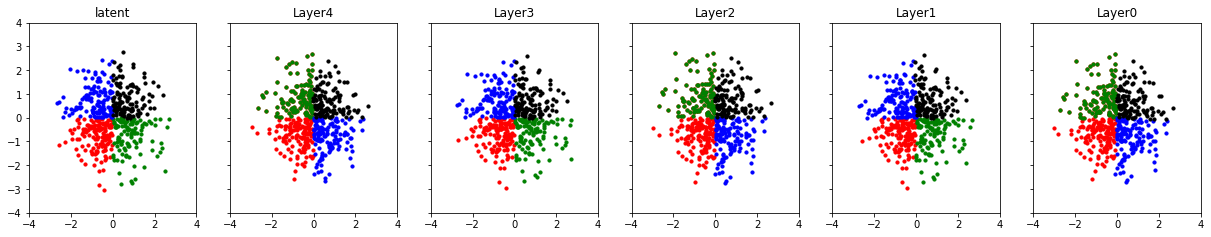

In [5]:
fig = visualize_moon(model, 500, direction='inverse', sharexy=True)

In [6]:
def loss_fun(y_true, y_pred):
    # negative log likelihood
    #  log_prob = -1/2 * prob^2
    #  - log_prob = 1/2 * prob^2
    return tf.math.reduce_sum(0.5 * y_pred **2)

model.compile(loss=loss_fun, optimizer='adam')

In [7]:
%%time
logger = NBatchLogger(n_display, n_epoch)
hist = model.fit(X, X,
                 epochs=n_epoch,
                 steps_per_epoch=1,
                 callbacks=[logger],
                 verbose=0)

=== Started at 2020-11-26 04h:36m:33s ===
 2020-11-26 04h:36m:35s | Epoch: 1/2000 | loss=1037.537720
 2020-11-26 04h:36m:47s | Epoch: 200/2000 | loss=-825.955322
 2020-11-26 04h:37m:00s | Epoch: 400/2000 | loss=-819.980530
 2020-11-26 04h:37m:12s | Epoch: 600/2000 | loss=-861.322144
 2020-11-26 04h:37m:24s | Epoch: 800/2000 | loss=-775.852539
 2020-11-26 04h:37m:36s | Epoch: 1000/2000 | loss=-882.275757
 2020-11-26 04h:37m:48s | Epoch: 1200/2000 | loss=-908.760620
 2020-11-26 04h:38m:01s | Epoch: 1400/2000 | loss=-877.158997
 2020-11-26 04h:38m:13s | Epoch: 1600/2000 | loss=-903.465759
 2020-11-26 04h:38m:25s | Epoch: 1800/2000 | loss=-925.409241
 2020-11-26 04h:38m:37s | Epoch: 2000/2000 | loss=-942.614014
=== Time elapsed: 2.0623 min (loss:-942.614014) ===
CPU times: user 13min 42s, sys: 38.9 s, total: 14min 21s
Wall time: 2min 3s


## Check results

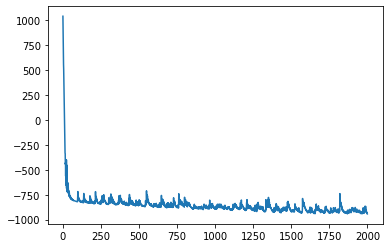

In [8]:
plt.plot(hist.history['loss'])

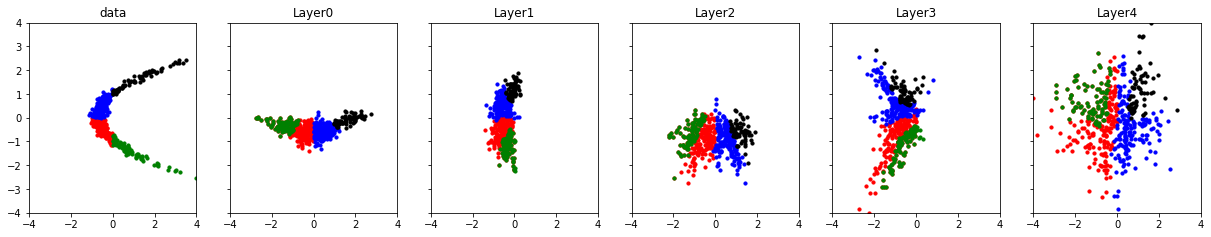

In [9]:
fig = visualize_moon(model, 500, direction='forward')

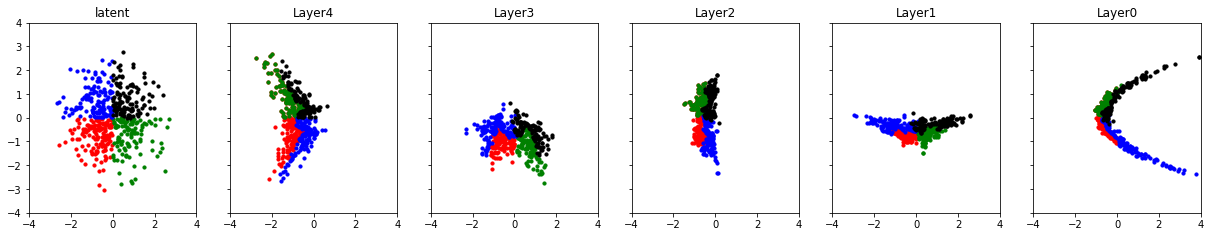

In [10]:
fig = visualize_moon(model, 500, direction='inverse')

MovieWriter imagemagick unavailable; using Pillow instead.


result/nvp_moon.gif saved


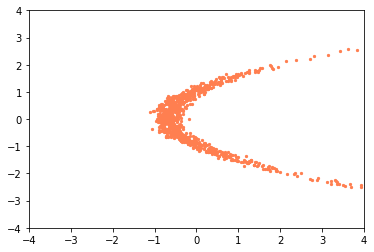

In [12]:
anim = animate_moon_gif(model, n_sample, filename='result/nvp_moon.gif')
HTML(anim.to_html5_video())